In [1]:
# importar pandas 
import pandas as pd 

# definir la ruta del archivo 
inicio_sesion_1 = 'datos_de_inicio_de_sesion_part1.csv'
inicio_sesion_2 = 'datos_de_inicio_de_sesion_part2.csv'

#Leer el archivo en un DataFrame
df1=pd.read_csv(inicio_sesion_1)
df2=pd.read_csv(inicio_sesion_2)

In [5]:
df=pd.concat([df1, df2])
df.tail(5)

,id,created_at,updated_at,sign_in_count,current_sign_in_at,last_sign_in_at
151679,1472403,2025-02-07T21:46:50.781074,2025-02-07T21:49:03.77932,20,2025-02-07T21:49:03.779092,2025-02-07T21:48:58.574139
151680,1472404,2025-02-07T21:59:38.31926,2025-02-07T22:29:07.79587,102,2025-02-07T22:29:07.795634,2025-02-07T22:29:01.847401
151681,1472405,2025-02-07T22:07:18.406263,2025-02-07T22:10:47.018589,15,2025-02-07T22:10:47.018278,2025-02-07T22:10:46.940442
151682,1472406,2025-02-07T22:17:35.503095,2025-02-07T22:28:59.752803,28,2025-02-07T22:28:59.752519,2025-02-07T22:28:58.020016
151683,1472407,2025-02-07T22:20:01.828163,2025-02-07T22:28:00.106585,32,2025-02-07T22:28:00.106338,2025-02-07T22:27:54.22567


In [6]:
df["created_at"].dtypes

dtype('O')

In [12]:
df["created_at"] = pd.to_datetime(df["created_at"], format="mixed")
df["updated_at"] = pd.to_datetime(df["updated_at"], format="mixed")
df["current_sign_in_at"] = pd.to_datetime(df["current_sign_in_at"], format="mixed")
df["last_sign_in_at"] = pd.to_datetime(df["last_sign_in_at"], format="mixed")

In [13]:
df.head()

,id,created_at,updated_at,sign_in_count,current_sign_in_at,last_sign_in_at
0,1,2016-10-13 14:45:08.552818,2019-08-05 16:54:45.408171,19,2016-10-13 15:47:47.765918,2016-10-13 15:47:40.631282
1,3,2016-10-13 15:25:34.023339,2019-08-05 16:56:47.337418,29,2017-03-30 15:45:55.166023,2017-03-23 21:34:26.362003
2,5,2016-10-13 16:13:29.256261,2019-08-05 16:54:45.385286,45,2017-01-05 18:55:18.333368,2017-01-05 18:54:34.124575
3,6,2016-10-13 16:40:02.353482,2025-02-06 20:27:40.126457,37111,2025-02-06 20:27:40.126184,2025-02-06 20:26:08.911018
4,7,2016-10-13 20:17:20.832300,2024-12-16 00:49:03.658712,11714,2024-12-16 00:49:03.657761,2024-12-16 00:49:00.722374


In [14]:
print(df.dtypes)

id                             int64
created_at            datetime64[ns]
updated_at            datetime64[ns]
sign_in_count                  int64
current_sign_in_at    datetime64[ns]
last_sign_in_at       datetime64[ns]
dtype: object


In [17]:
df["diff_days"] = (df["last_sign_in_at"] - df["created_at"]).dt.days

In [18]:
df.head()

,id,created_at,updated_at,sign_in_count,current_sign_in_at,last_sign_in_at,diff_days
0,1,2016-10-13 14:45:08.552818,2019-08-05 16:54:45.408171,19,2016-10-13 15:47:47.765918,2016-10-13 15:47:40.631282,0.0
1,3,2016-10-13 15:25:34.023339,2019-08-05 16:56:47.337418,29,2017-03-30 15:45:55.166023,2017-03-23 21:34:26.362003,161.0
2,5,2016-10-13 16:13:29.256261,2019-08-05 16:54:45.385286,45,2017-01-05 18:55:18.333368,2017-01-05 18:54:34.124575,84.0
3,6,2016-10-13 16:40:02.353482,2025-02-06 20:27:40.126457,37111,2025-02-06 20:27:40.126184,2025-02-06 20:26:08.911018,3038.0
4,7,2016-10-13 20:17:20.832300,2024-12-16 00:49:03.658712,11714,2024-12-16 00:49:03.657761,2024-12-16 00:49:00.722374,2985.0


In [20]:
import numpy as np
df["sign_ins_per_day"] = df["sign_in_count"] / df["diff_days"].replace(0, np.nan)

In [21]:
df.head()

,id,created_at,updated_at,sign_in_count,current_sign_in_at,last_sign_in_at,diff_days,sign_ins_per_day
0,1,2016-10-13 14:45:08.552818,2019-08-05 16:54:45.408171,19,2016-10-13 15:47:47.765918,2016-10-13 15:47:40.631282,0.0,NaN
1,3,2016-10-13 15:25:34.023339,2019-08-05 16:56:47.337418,29,2017-03-30 15:45:55.166023,2017-03-23 21:34:26.362003,161.0,0.180124
2,5,2016-10-13 16:13:29.256261,2019-08-05 16:54:45.385286,45,2017-01-05 18:55:18.333368,2017-01-05 18:54:34.124575,84.0,0.535714
3,6,2016-10-13 16:40:02.353482,2025-02-06 20:27:40.126457,37111,2025-02-06 20:27:40.126184,2025-02-06 20:26:08.911018,3038.0,12.215602
4,7,2016-10-13 20:17:20.832300,2024-12-16 00:49:03.658712,11714,2024-12-16 00:49:03.657761,2024-12-16 00:49:00.722374,2985.0,3.924288


In [32]:
Q1 = df["sign_ins_per_day"].quantile(0.25)
Q3 = df["sign_ins_per_day"].quantile(0.75)
IQR = Q3 - Q1

# Límites para valores atípicos
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores atípicos
outliers = df[(df["sign_ins_per_day"] < lower_bound) | (df["sign_ins_per_day"] > upper_bound)]

num_outliers = outliers.shape[0]
print(f"Cantidad de valores atípicos: {num_outliers}")

porcentaje_outliers = (num_outliers / df.shape[0]) * 100
print(f"Porcentaje de valores atípicos: {porcentaje_outliers:.2f}%")


Cantidad de valores atípicos: 91870
Porcentaje de valores atípicos: 7.65%


In [28]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [25]:
! pip install matplotlib

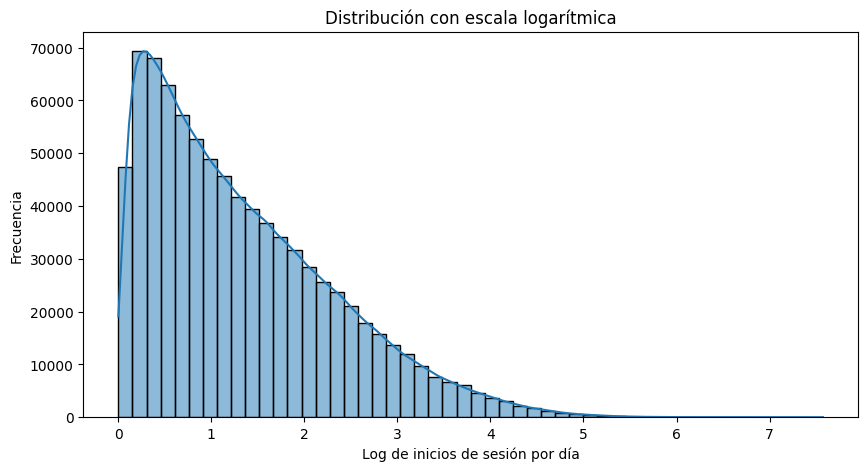

In [35]:
df["log_sign_ins_per_day"] = np.log1p(df["sign_ins_per_day"])

plt.figure(figsize=(10, 5))
sns.histplot(df["log_sign_ins_per_day"], bins=50, kde=True)
plt.title("Distribución con escala logarítmica")
plt.xlabel("Log de inicios de sesión por día")
plt.ylabel("Frecuencia")
plt.show()

In [36]:
# ver qué usuarios tienen actividad inusualmente alta o baja
print(outliers[["id", "sign_ins_per_day"]].sort_values(by="sign_ins_per_day", ascending=False))

             id  sign_ins_per_day
33923     42775       1944.000000
109828  1425556       1906.000000
113354  1429861       1622.500000
112041  1428218       1382.500000
112761  1429135       1020.500000
...         ...               ...
527168   668723         14.055556
489437   628518         14.055556
645386   795030         14.055556
495052   634469         14.055556
778537   938295         14.054054

[91870 rows x 2 columns]


In [37]:
#ver los 10 usuarios con más inicios de sesión por día:
print(df.nlargest(10, "sign_ins_per_day")[["id", "sign_ins_per_day"]])

             id  sign_ins_per_day
33923     42775            1944.0
109828  1425556            1906.0
113354  1429861            1622.5
112041  1428218            1382.5
112761  1429135            1020.5
113363  1429873            1003.0
113722  1430318             953.0
107955  1422979             937.0
140310  1459822             933.0
109510  1425149             915.0
